In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

Welcome to JupyROOT 6.26/04


In [2]:
from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

In [3]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p','antiKstar_InvM','D0_cosHel_0']

#  sig+bkg

In [4]:
ccbar_name_ctrl = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/ccbar/control_tightcut_700fb_ccbar_recon_output_0*.root'
uubar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "uubar")
ddbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ddbar")
ssbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ssbar")
charged_name_ctrl = ccbar_name_ctrl.replace("ccbar", "charged")
mixed_name_ctrl = ccbar_name_ctrl.replace("ccbar", "mixed")
taupair_name_ctrl = ccbar_name_ctrl.replace("ccbar", "taupair")

In [5]:
base_filter = 'antiKstarpi0_rank_Dstp==1 && D0_M>1.70 && D0_M<1.98'

In [6]:
base_ccbar_700_ctrl = get_pd(file=ccbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_uubar_700_ctrl = get_pd(file=uubar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ddbar_700_ctrl = get_pd(file=ddbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ssbar_700_ctrl = get_pd(file=ssbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_charged_700_ctrl = get_pd(file=charged_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_mixed_700_ctrl = get_pd(file=mixed_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_taupair_700_ctrl = get_pd(file=taupair_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )


In [7]:
cut = 'D0_M>0'
ccbar_700_ctrl = base_ccbar_700_ctrl.query(cut)
uubar_700_ctrl = base_uubar_700_ctrl.query(cut)
ddbar_700_ctrl = base_ddbar_700_ctrl.query(cut)
ssbar_700_ctrl = base_ssbar_700_ctrl.query(cut)
charged_700_ctrl = base_charged_700_ctrl.query(cut)
mixed_700_ctrl = base_mixed_700_ctrl.query(cut)
taupair_700_ctrl = base_taupair_700_ctrl.query(cut)

D0_M


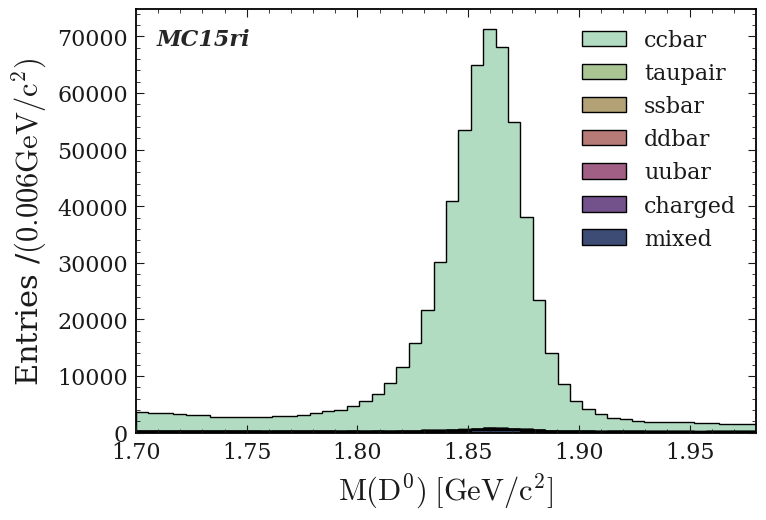

mixed = 6050
charged = 1477
uubar = 5237
ddbar = 1484
ccbar = 615888
ssbar = 2244
taupair = 84
TOTAL # = 632380


<Figure size 800x550 with 0 Axes>

In [8]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]

D0M_range=(1.7,1.98)
n, xe = np.histogram(mixed_700_ctrl["D0_M"], bins=50, range=D0M_range)
colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_700_ctrl[var] }
    charged_bkg = {var : charged_700_ctrl[var] }
    ccbar_bkg = {var : ccbar_700_ctrl[var] }
    uubar_bkg = {var : uubar_700_ctrl[var] }
    ddbar_bkg = {var : ddbar_700_ctrl[var] }
    ssbar_bkg = {var : ssbar_700_ctrl[var] }
    taupair_bkg = {var : taupair_700_ctrl[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    

    ax.set_xlim(*D0M_range)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


D0_cosHel_0


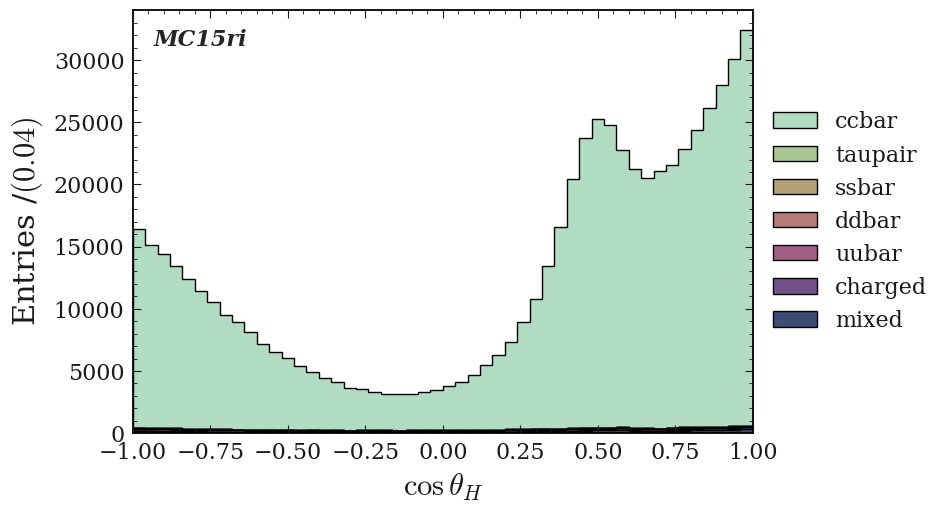

mixed = 6050
charged = 1477
uubar = 5237
ddbar = 1484
ccbar = 615888
ssbar = 2244
taupair = 84
TOTAL # = 632380


<Figure size 800x550 with 0 Axes>

In [9]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]

D0_cosHel_0_range=(-1,1)
n, xe = np.histogram(mixed_700_ctrl["D0_cosHel_0"], bins=50, range=D0_cosHel_0_range)
colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_700_ctrl[var] }
    charged_bkg = {var : charged_700_ctrl[var] }
    ccbar_bkg = {var : ccbar_700_ctrl[var] }
    uubar_bkg = {var : uubar_700_ctrl[var] }
    ddbar_bkg = {var : ddbar_700_ctrl[var] }
    ssbar_bkg = {var : ssbar_700_ctrl[var] }
    taupair_bkg = {var : taupair_700_ctrl[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    

    ax.set_xlim(*D0_cosHel_0_range)
#     ax.set_ylim(0,6000)

    plt.xlabel(r"$\cos \theta_H$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


Dstarp_CMS_p


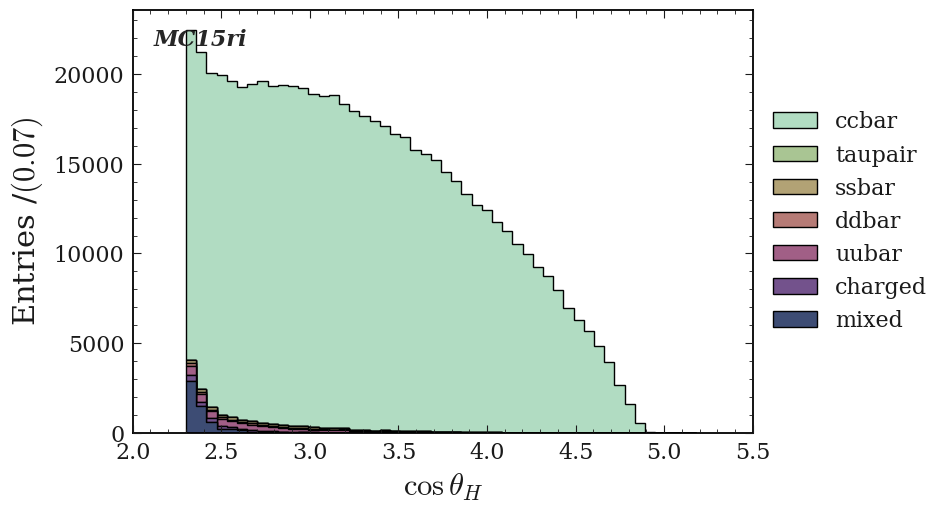

mixed = 6050
charged = 1477
uubar = 5237
ddbar = 1484
ccbar = 615888
ssbar = 2244
taupair = 84
TOTAL # = 632380


<Figure size 800x550 with 0 Axes>

In [11]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]

D0_cosHel_0_range=(2,5.5)
n, xe = np.histogram(mixed_700_ctrl["Dstarp_CMS_p"], bins=50, range=D0_cosHel_0_range)
colors=b2helix(7)

data_list=dict()
signal_variables = ["Dstarp_CMS_p"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_700_ctrl[var] }
    charged_bkg = {var : charged_700_ctrl[var] }
    ccbar_bkg = {var : ccbar_700_ctrl[var] }
    uubar_bkg = {var : uubar_700_ctrl[var] }
    ddbar_bkg = {var : ddbar_700_ctrl[var] }
    ssbar_bkg = {var : ssbar_700_ctrl[var] }
    taupair_bkg = {var : taupair_700_ctrl[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    

    ax.set_xlim(*D0_cosHel_0_range)
#     ax.set_ylim(0,6000)

    plt.xlabel(r"$\cos \theta_H$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


# Only bkg

In [3]:
ccbar_name_ctrl = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/ccbar/control_onlybkg_060110_ccbar_recon_output_0*.root'
uubar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "uubar")
ddbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ddbar")
ssbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ssbar")
charged_name_ctrl = ccbar_name_ctrl.replace("ccbar", "charged")
mixed_name_ctrl = ccbar_name_ctrl.replace("ccbar", "mixed")
taupair_name_ctrl = ccbar_name_ctrl.replace("ccbar", "taupair")

In [4]:
# base_filter = 'antiKstarpi0_rank_Dstp==1 && D0_M>1.70 && D0_M<1.98'
base_filter = 'abs(antiKstar_InvM - 0.89555)<0.06 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.3 && antiKstarpi0_rank_Dstp==1'

In [5]:
signal_variables = ['D0_M','D0_cosHel_0']

In [6]:
bkg_base_ccbar_700_ctrl = get_np(file=ccbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

bkg_base_uubar_700_ctrl = get_np(file=uubar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

bkg_base_ddbar_700_ctrl = get_np(file=ddbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

bkg_base_ssbar_700_ctrl = get_np(file=ssbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

bkg_base_charged_700_ctrl = get_np(file=charged_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

bkg_base_mixed_700_ctrl = get_np(file=mixed_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

bkg_base_taupair_700_ctrl = get_np(file=taupair_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )


In [7]:
bkg_base_ccbar_700_ctrl = pd.DataFrame(bkg_base_ccbar_700_ctrl)
bkg_base_uubar_700_ctrl = pd.DataFrame(bkg_base_uubar_700_ctrl)
bkg_base_ddbar_700_ctrl = pd.DataFrame(bkg_base_ddbar_700_ctrl)
bkg_base_ssbar_700_ctrl = pd.DataFrame(bkg_base_ssbar_700_ctrl)
bkg_base_charged_700_ctrl = pd.DataFrame(bkg_base_charged_700_ctrl)
bkg_base_mixed_700_ctrl = pd.DataFrame(bkg_base_mixed_700_ctrl)
bkg_base_taupair_700_ctrl = pd.DataFrame(bkg_base_taupair_700_ctrl)

In [8]:
cut = 'D0_M>1.7 and D0_M<1.98'
# cut = 'D0_cosHel_0>-1'

bkg_ccbar_700_ctrl = bkg_base_ccbar_700_ctrl.query(cut)
bkg_uubar_700_ctrl = bkg_base_uubar_700_ctrl.query(cut)
bkg_ddbar_700_ctrl = bkg_base_ddbar_700_ctrl.query(cut)
bkg_ssbar_700_ctrl = bkg_base_ssbar_700_ctrl.query(cut)
bkg_charged_700_ctrl = bkg_base_charged_700_ctrl.query(cut)
bkg_mixed_700_ctrl = bkg_base_mixed_700_ctrl.query(cut)
bkg_taupair_700_ctrl = bkg_base_taupair_700_ctrl.query(cut)

D0_M


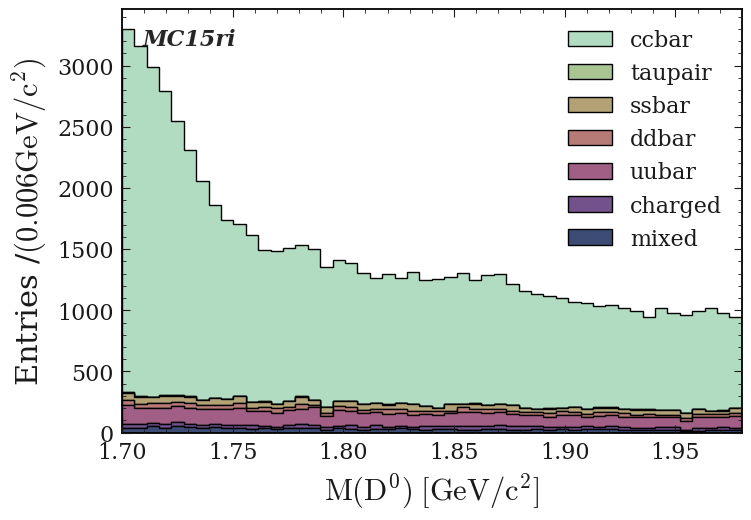

mixed = 1472
charged = 1249
uubar = 5293
ddbar = 1490
ccbar = 61171
ssbar = 2112
taupair = 102
TOTAL # = 72787


<Figure size 800x550 with 0 Axes>

In [9]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]

D0M_range=(1.7,1.98)
n, xe = np.histogram(bkg_mixed_700_ctrl["D0_M"], bins=50, range=D0M_range)
colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : bkg_mixed_700_ctrl[var] }
    charged_bkg = {var : bkg_charged_700_ctrl[var] }
    ccbar_bkg = {var : bkg_ccbar_700_ctrl[var] }
    uubar_bkg = {var : bkg_uubar_700_ctrl[var] }
    ddbar_bkg = {var : bkg_ddbar_700_ctrl[var] }
    ssbar_bkg = {var : bkg_ssbar_700_ctrl[var] }
    taupair_bkg = {var : bkg_taupair_700_ctrl[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    

    ax.set_xlim(*D0M_range)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


D0_cosHel_0


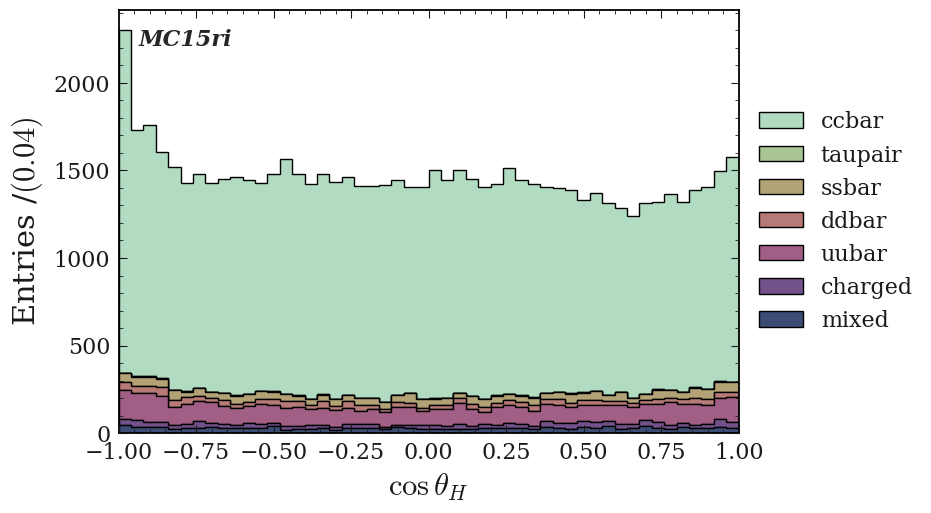

mixed = 1472
charged = 1249
uubar = 5293
ddbar = 1490
ccbar = 61171
ssbar = 2112
taupair = 102
TOTAL # = 72787


<Figure size 800x550 with 0 Axes>

In [10]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]

D0_cosHel_0_range=(-1,1)
n, xe = np.histogram(bkg_mixed_700_ctrl["D0_cosHel_0"], bins=50, range=D0_cosHel_0_range)
colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_cosHel_0"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : bkg_mixed_700_ctrl[var] }
    charged_bkg = {var : bkg_charged_700_ctrl[var] }
    ccbar_bkg = {var : bkg_ccbar_700_ctrl[var] }
    uubar_bkg = {var : bkg_uubar_700_ctrl[var] }
    ddbar_bkg = {var : bkg_ddbar_700_ctrl[var] }
    ssbar_bkg = {var : bkg_ssbar_700_ctrl[var] }
    taupair_bkg = {var : bkg_taupair_700_ctrl[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo=r"MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    

    ax.set_xlim(*D0_cosHel_0_range)
#     ax.set_ylim(0,6000)

    plt.xlabel(r"$\cos \theta_H$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) }")


## Fitting only bkg

In [75]:
# bkg_ccbar_700_ctrl = bkg_base_ccbar_700_ctrl.query(cut)
# bkg_uubar_700_ctrl = bkg_base_uubar_700_ctrl.query(cut)
# bkg_ddbar_700_ctrl = bkg_base_ddbar_700_ctrl.query(cut)
# bkg_ssbar_700_ctrl = bkg_base_ssbar_700_ctrl.query(cut)
# bkg_charged_700_ctrl = bkg_base_charged_700_ctrl.query(cut)
# bkg_mixed_700_ctrl = bkg_base_mixed_700_ctrl.query(cut)
# bkg_taupair_700_ctrl = bkg_base_taupair_700_ctrl.query(cut)

In [28]:
bkg_700_ctrl = pd.concat([bkg_ccbar_700_ctrl, bkg_uubar_700_ctrl, bkg_ddbar_700_ctrl, bkg_ssbar_700_ctrl,
                             bkg_charged_700_ctrl, bkg_mixed_700_ctrl, bkg_taupair_700_ctrl], ignore_index=True)

In [29]:
bkg_700_ctrl

,D0_M,D0_cosHel_0
0,1.727073,0.840765
1,1.926375,0.897709
2,1.738465,-0.973558
3,1.817729,-0.466050
4,1.918871,0.956148
...,...,...
72884,1.726190,-0.571346
72885,1.817838,0.502869
72886,1.819445,-0.913623
72887,1.756885,-0.442278


In [30]:
bkg_700_ctrl.corr(method='pearson')

,D0_M,D0_cosHel_0
D0_M,1.000000,0.051906
D0_cosHel_0,0.051906,1.000000


In [13]:
bkg_D0_M_700_ctrl_numpy = bkg_700_ctrl['D0_M'].to_numpy()
bkg_D0_cosHel_0_700_ctrl_numpy = bkg_700_ctrl['D0_cosHel_0'].to_numpy()

In [14]:
bkg_D0_cosHel_0_700_ctrl_numpy

array([ 0.84076505,  0.89770937, -0.97355849, ..., -0.91362265,
       -0.44227759, -0.09673274])

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.7,1.98]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.7,1.98]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.7,1.98]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable ! 
[#1] INFO:Eval -- RooAbsT

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file test.png has been created


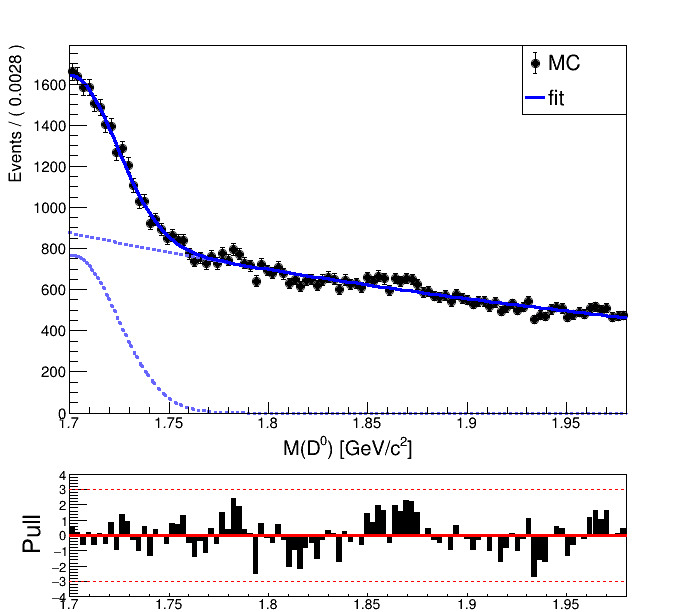

In [15]:
file_name='test.png'
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.70, 1.98, "")
# x.setBins(70)
# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )
mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.7,1.6, 1.75)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
tau = ROOT.RooRealVar("tau", "tau",-2, -10,0)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooExponential("sig2", "Signal component 2", x, tau)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal1", [sig1, sig2], sig1frac)

# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
# sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": bkg_D0_M_700_ctrl_numpy}, [x])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.70,1.98))

# r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.70)
xmax1 = ctypes.c_double(1.98)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file_name)

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 2] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'fit' created with bounds [-1,1]
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'NormalizationRangeForfit' created with boun

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


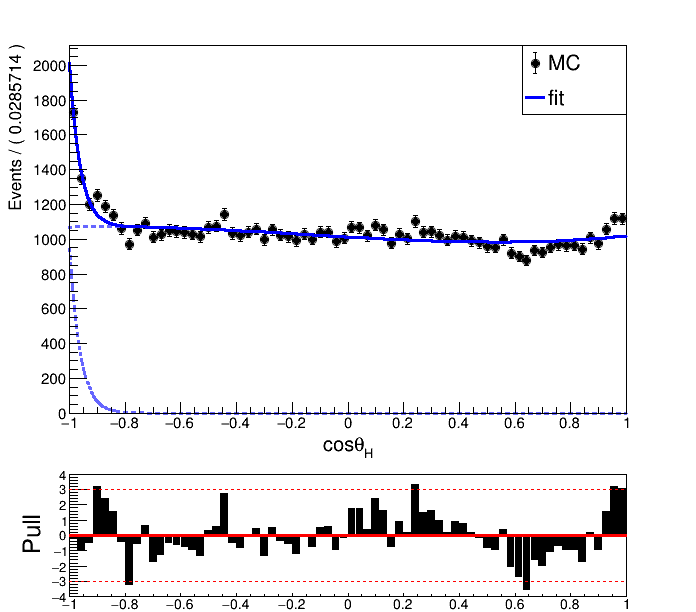

In [27]:
file_name='test.png'
xrange=(-1,1)
x = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", xrange[0], xrange[1],"")
x.setBins(70)
# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )
mean = ROOT.RooRealVar("mean", "mean of gaussians", -1,-2,0)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.2,0,2)
# mean2 = ROOT.RooRealVar("mean2", "mean of gaussians", 1.5,-2,0)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.2,0,2)
# tau = ROOT.RooRealVar("tau", "tau",-2, -10,0)

c0 = ROOT.RooRealVar("c0", "c0",0.5, -1,1)
c1 = ROOT.RooRealVar("c1", "c2",0.5, -1,1)
c2 = ROOT.RooRealVar("c1", "c2",0.5, -1,1)


# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.5)
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 10,0,200)

# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean2, sigma2)

# sig2 = ROOT.RooExponential("sig2", "Signal component 2", x, tau)
# sig3 = ROOT.RooPolynomial("sig3", "Signal component 3", x, ROOT.RooArgList(c0), lowestOrder=1)
sig2 = ROOT.RooChebychev("sig2", "Signal component 1", x, ROOT.RooArgList(c0, c1, c2))


# sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal1", [sig1, sig2], sig1frac)

# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
# sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)

data = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": bkg_D0_cosHel_0_700_ctrl_numpy}, [x])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(xrange[0],xrange[1]))

# r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="sig3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(xrange[0])
xmax1 = ctypes.c_double(xrange[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file_name)

##  2d fit

In [31]:
D0_M_np_data = bkg_D0_M_700_ctrl_numpy
D0_cosHel_0_np_data = bkg_D0_cosHel_0_700_ctrl_numpy

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigmay1' with range [0, 2] of the RooGaussian 'sigy1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name c1 is already in this set
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_x.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_y.png has been created


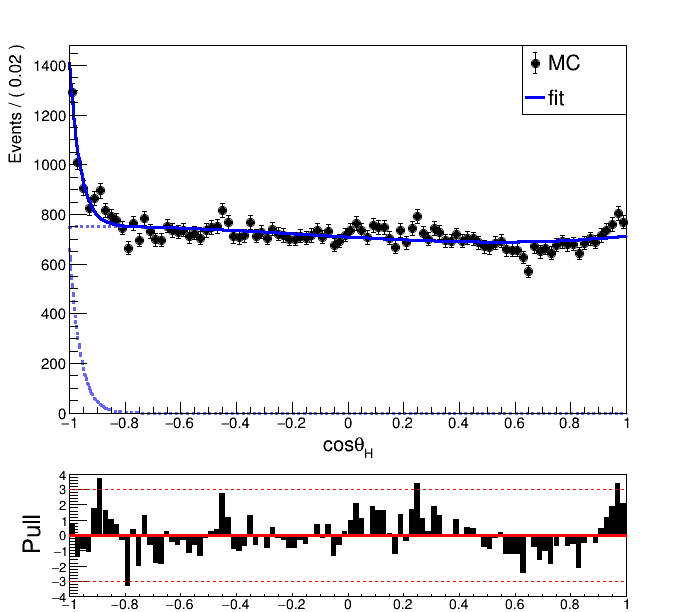

In [32]:
file1_name="test2_x.png"
file2_name="test2_y.png"
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.70, 1.98, "")
# x.setBins(50)
    # rooDataSet = ROOT_df_start.Book(
    #     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
    # )
    # rooDataSet2 = ROOT_df_start.Book(
    #     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
    # )
mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.7,1.6, 1.75)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)

tau = ROOT.RooRealVar("tau", "tau",-2, -10,0)
   

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooExponential("sig2", "Signal component 2", x, tau)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
mass_sig = ROOT.RooAddPdf("mass_sig", "Signal1", [sig1, sig2], sig1frac)


################
yrange=(-1,1)
y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", yrange[0], yrange[1], "")
# y.setBins(50)

meany = ROOT.RooRealVar("meany", "mean of gaussians", -1,-2,0)
sigmay1 = ROOT.RooRealVar("sigmay1", "width of gaussians", 0.2,0,2)
# mean2 = ROOT.RooRealVar("mean2", "mean of gaussians", 1.5,-2,0)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.2,0,2)
# tau = ROOT.RooRealVar("tau", "tau",-2, -10,0)

c0 = ROOT.RooRealVar("c0", "c0",0.5, -1,1)
c1 = ROOT.RooRealVar("c1", "c2",0.5, -1,1)
c2 = ROOT.RooRealVar("c1", "c2",0.5, -1,1)

sigy1 = ROOT.RooGaussian("sigy1", "Signal component 1", y, meany, sigmay1)
sigy2 = ROOT.RooChebychev("sigy2", "Signal component 1", y, ROOT.RooArgList(c0, c1, c2))


# sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

sigy1frac = ROOT.RooRealVar("sigy1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
cosHel_sig = ROOT.RooAddPdf("sig", "Signal1", [sigy1, sigy2], sigy1frac)


################
sig_xy_model = ROOT.RooProdPdf("sig_xy_model","sig_xy_model",ROOT.RooArgSet(mass_sig,cosHel_sig))


# datax = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])
# datay = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": np_data['D0_cosHel_0']}, [y])

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": D0_M_np_data, "cos#theta_{H}": D0_cosHel_0_np_data}, [x,y])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    # r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r = sig_xy_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))
r = sig_xy_model.fitTo(data,NumCPU=12)

    # r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")
sig_xy_model.plotOn(frame, Name="fitx1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig_xy_model.plotOn(frame, Name="fitx2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig_xy_model.plotOn(frame, Name="fitx3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

sig_xy_model.plotOn(frame, Components=mass_sig ,Name="fitting")
frame.Draw("PE")

    # sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
    


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
    # leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.70)
xmax1 = ctypes.c_double(1.98)
    # xmin1 = 0.1
    # xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file1_name)

#######################################
canv2 = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
# canv2.cd()
y_xlow = ctypes.c_double()
y_ylow = ctypes.c_double()
y_xup = ctypes.c_double()
y_yup = ctypes.c_double()

canv2.GetPad(0).GetPadPar(y_xlow, y_ylow, y_xup, y_yup)
canv2.Divide(1,2)

y_xlow = y_xlow.value
y_ylow = y_ylow.value
y_xup = y_xup.value
y_yup = y_yup.value

y_upPad = canv2.GetPad(1)
y_upPad.SetPad(y_xlow, y_ylow+0.25*(y_yup-y_ylow),y_xup,y_yup)

y_dwPad = canv2.GetPad(2)
y_dwPad.SetPad(y_xlow, y_ylow,y_xup,y_ylow+0.25*(y_yup-y_ylow))


yframe = y.frame(Title=" ")
canv2.cd(1) 
data.plotOn(yframe,Name = "data2", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")

sig_xy_model.plotOn(yframe, Name="fit1", Components=sigy1, LineStyle=ROOT.kDashed, LineColor=593)
sig_xy_model.plotOn(yframe, Name="fit2", Components=sigy2, LineStyle=ROOT.kDashed, LineColor=593)
# sig_xy_model.plotOn(yframe, Name="fit3", Components=sigy3, LineStyle=ROOT.kDashed, LineColor=593)
sig_xy_model.plotOn(yframe, Components=cosHel_sig  ,Name="fitting2")



yframe.Draw("PE")

    # sig.paramOn(frame)
yframe.GetXaxis().SetTitleSize(0.047)
yframe.GetXaxis().CenterTitle(True)
yframe.GetYaxis().SetTitleSize(0.04)
yframe.GetYaxis().SetTitleOffset(1.2)
    


y_leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
y_leg1.SetFillColor(ROOT.kWhite)
    # leg1.SetHeader("The Legend title","C")
y_leg1.AddEntry("data2", "MC", "PE")
y_leg1.AddEntry("fitting2", "fit", "l")
y_leg1.Draw()

y_hpull = yframe.pullHist()
y_hpull.SetFillStyle(1001)
y_hpull.SetFillColor(1);
for i in range(0,y_hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    y_hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
y_pullplot = y.frame()
y_pullplot.SetTitle("")
y_pullplot.addPlotable(y_hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

y_pullplot.SetYTitle("Pull")
y_pullplot.GetXaxis().SetTitleSize(0)
y_pullplot.GetYaxis().SetTitleSize(0.17)
y_pullplot.GetYaxis().CenterTitle(True)
y_pullplot.GetYaxis().SetTitleOffset(0.2)
y_pullplot.SetMinimum(-4.)
y_pullplot.SetMaximum(4.)
y_pullplot.GetXaxis().SetLabelSize(0.1)
y_pullplot.GetYaxis().SetLabelSize(0.09)
canv2.cd(2)
y_pullplot.Draw()

y_xmin1 = ctypes.c_double(-1)
y_xmax1 = ctypes.c_double(1)
y_line = ROOT.TLine(y_xmin1,0.0,y_xmax1,0.0)
y_line1 = ROOT.TLine(y_xmin1,3.0,y_xmax1,3.0)
y_line2 = ROOT.TLine(y_xmin1,-3.0,y_xmax1,-3.0)

y_line.SetLineColor(ROOT.kRed)
y_line.SetLineWidth(3)
y_line1.SetLineColor(ROOT.kRed)
y_line2.SetLineColor(ROOT.kRed)
y_line1.SetLineStyle(2)
y_line2.SetLineStyle(2)
y_line.Draw("SAME")
y_line1.Draw("SAME")
y_line2.Draw("SAME")

canv2.Update()

canv2.Draw()
canv2.SaveAs(file2_name)

# sig+bkg fitting

In [33]:
ccbar_name_ctrl = '/media/jykim/T7/storage/01_recon/merge_generic_bkg/ccbar/control_tightcut_700fb_ccbar_recon_output_0*.root'
uubar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "uubar")
ddbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ddbar")
ssbar_name_ctrl = ccbar_name_ctrl.replace("ccbar", "ssbar")
charged_name_ctrl = ccbar_name_ctrl.replace("ccbar", "charged")
mixed_name_ctrl = ccbar_name_ctrl.replace("ccbar", "mixed")
taupair_name_ctrl = ccbar_name_ctrl.replace("ccbar", "taupair")

In [34]:
base_filter = 'antiKstarpi0_rank_Dstp==1 && D0_M>1.70 && D0_M<1.98'
signal_variables=['D0_M','D0_cosHel_0']

In [35]:
base_ccbar_700_ctrl = get_pd(file=ccbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_uubar_700_ctrl = get_pd(file=uubar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ddbar_700_ctrl = get_pd(file=ddbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_ssbar_700_ctrl = get_pd(file=ssbar_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_charged_700_ctrl = get_pd(file=charged_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_mixed_700_ctrl = get_pd(file=mixed_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )

base_taupair_700_ctrl = get_pd(file=taupair_name_ctrl, tree='control', base_filter=base_filter,variables=signal_variables )


In [36]:
cut = 'D0_M>0'
ccbar_700_ctrl = base_ccbar_700_ctrl.query(cut)
uubar_700_ctrl = base_uubar_700_ctrl.query(cut)
ddbar_700_ctrl = base_ddbar_700_ctrl.query(cut)
ssbar_700_ctrl = base_ssbar_700_ctrl.query(cut)
charged_700_ctrl = base_charged_700_ctrl.query(cut)
mixed_700_ctrl = base_mixed_700_ctrl.query(cut)
taupair_700_ctrl = base_taupair_700_ctrl.query(cut)

In [37]:
# ccbar_700_ctrl = base_ccbar_700_ctrl.query(cut)
# uubar_700_ctrl = base_uubar_700_ctrl.query(cut)
# ddbar_700_ctrl = base_ddbar_700_ctrl.query(cut)
# ssbar_700_ctrl = base_ssbar_700_ctrl.query(cut)
# charged_700_ctrl = base_charged_700_ctrl.query(cut)
# mixed_700_ctrl = base_mixed_700_ctrl.query(cut)
# taupair_700_ctrl = base_taupair_700_ctrl.query(cut)

In [38]:
sig_bkg_700_ctrl = pd.concat([ccbar_700_ctrl, uubar_700_ctrl, ddbar_700_ctrl, ssbar_700_ctrl,
                             charged_700_ctrl, mixed_700_ctrl, taupair_700_ctrl], ignore_index=True)

In [39]:
sig_bkg_D0_M_700_ctrl_numpy = sig_bkg_700_ctrl['D0_M'].to_numpy()
sig_bkg_D0_cosHel_0_700_ctrl_numpy = sig_bkg_700_ctrl['D0_cosHel_0'].to_numpy()

### D0_M

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma1_1' with range [0, 1] of the RooGaussian 'sig1_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma1_3' with range [0, 0.5] of the RooGaussian 'sig1_3' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2_1' with range [0, 1] of the RooGaussian 'sig2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2_3' with range [0, 0.5] of the RooGaussian 'sig2_3' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.7,1.98]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activat

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


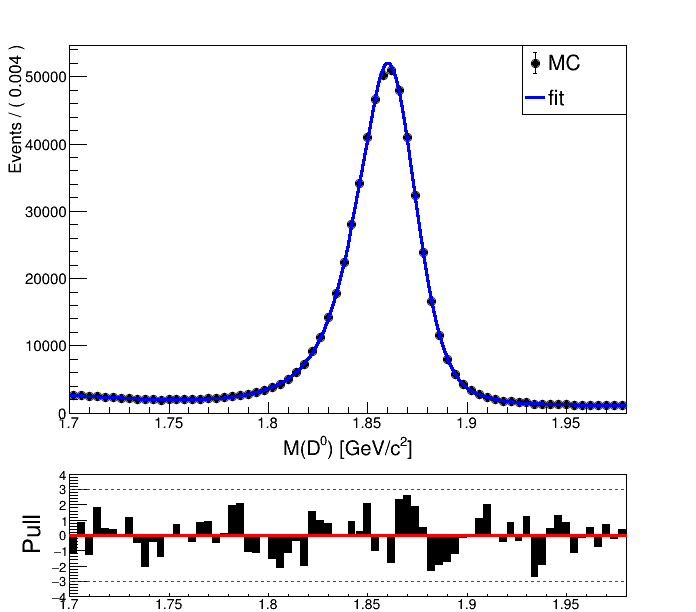

In [50]:
file_name='test.png'
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.70, 1.98, "")
x.setBins(70)
# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )
mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.7,1.6, 1.75)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
tau = ROOT.RooRealVar("tau", "tau",-2, -10,0)

mean1 = ROOT.RooRealVar("mean1", "mean of gaussians", 1.861,1.84, 1.89)
sigma1_1 = ROOT.RooRealVar("sigma1_1", "width of gaussians", 0.021,0,1)
sigma1_2 = ROOT.RooRealVar("sigma1_2", "width of gaussians", 0.011,0,0.5)
sigma1_3= ROOT.RooRealVar("sigma1_3", "width of gaussians", 0.011,0,0.5)
alpha1 = ROOT.RooRealVar("alpha1", "width of gaussians", 0.71,0,5)
n_CB1 = ROOT.RooRealVar("n_CB1", "width of gaussians", 10.1,0,100) 

# mean2 = ROOT.RooRealVar("mean2", "mean of gaussians", 1.862,1.84, 1.89)
sigma2_1 = ROOT.RooRealVar("sigma2_1", "width of gaussians", 0.022,0,1)
sigma2_2 = ROOT.RooRealVar("sigma2_2", "width of gaussians", 0.012,0,0.5)
sigma2_3 = ROOT.RooRealVar("sigma2_3", "width of gaussians", 0.012,0,0.5)
alpha2 = ROOT.RooRealVar("alpha2", "width of gaussians", 0.72,0,5)
n_CB2 = ROOT.RooRealVar("n_CB2", "width of gaussians", 10.2,0,100) 
Novo_width2 = ROOT.RooRealVar("Novo_width2", "Novo peak", 0.52,0,1)    
Novo_tail2 = ROOT.RooRealVar("Novo_tail2", "Novo peak", 0.12,0,1) 

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooExponential("sig2", "Signal component 2", x, tau)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
bkg = ROOT.RooAddPdf("bkg", "Signal1", [sig1, sig2], sig1frac)

sig1_1 = ROOT.RooGaussian("sig1_1", "Signal component 1", x, mean1, sigma1_1)
sig1_2 = ROOT.RooCBShape("sig1_2", "Signal component 2", x, mean1, sigma1_2, alpha1, n_CB1)
sig1_3 = ROOT.RooGaussian("sig1_3", "Signal component 1", x, mean1, sigma1_3)


sig1_1frac = ROOT.RooRealVar("sig1_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum1_1 = ROOT.RooAddPdf("sig_sum1_1", "Signal1", [sig1_1, sig1_2], sig1_1frac)
sig1_2frac = ROOT.RooRealVar("sig1_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig1_temp = ROOT.RooAddPdf("sig1_temp", "Signal", [sig1_3, sig_sum1_1], sig1_2frac)

sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", x, mean1, sigma2_1)
sig2_2 = ROOT.RooCBShape("sig2_2", "Signal component 2", x, mean1, sigma2_2, alpha2, n_CB2)
sig2_3 = ROOT.RooGaussian("sig2_3", "Signal component 1", x, mean1, sigma2_3)
#sig2_3 = ROOT.RooNovosibirsk("sig2_3", "Signal component 3", x, mean2, Novo_width2, Novo_tail2)

sig2_1frac = ROOT.RooRealVar("sig2_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum2_1 = ROOT.RooAddPdf("sig_sum2_1", "Signal1", [sig2_1, sig2_2], sig2_1frac)
sig2_2frac = ROOT.RooRealVar("sig2_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig2_temp = ROOT.RooAddPdf("sig2_temp", "Signal", [sig2_3, sig_sum2_1], sig2_2frac)


real_sig_frac = ROOT.RooRealVar("real_sig_frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_bkg_model = ROOT.RooAddPdf("sig_bkg_model", "Signal", [sig1_temp, bkg], real_sig_frac)

real_sig_frac2 = ROOT.RooRealVar("real_sig_frac2", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig2_temp, sig_bkg_model], real_sig_frac2)

# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
# sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": sig_bkg_D0_M_700_ctrl_numpy}, [x])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.70,1.98))

# r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.70)
xmax1 = ctypes.c_double(1.98)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file_name)

In [12]:
# signal + 5 functions

In [ ]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.70, 1.98, "")
# x.setBins(70)


mean1 = ROOT.RooRealVar("mean1", "mean of gaussians", 1.86,1.84, 1.89)
sigma1_1 = ROOT.RooRealVar("sigma1_1", "width of gaussians", 0.03,0,1)
sigma1_2 = ROOT.RooRealVar("sigma1_2", "width of gaussians", 0.01,0,0.5)
alpha1 = ROOT.RooRealVar("alpha1", "width of gaussians", 0.5,0,10)
n_CB1 = ROOT.RooRealVar("n_CB1", "width of gaussians", 10,0,200) 
Novo_width1 = ROOT.RooRealVar("Novo_width1", "Novo peak", 0.05,0,0.5)    
Novo_tail1 = ROOT.RooRealVar("Novo_tail1", "Novo peak", 0.5,0,10)    

mean2 = ROOT.RooRealVar("mean2", "mean of gaussians", 1.86,1.84, 1.89)
sigma2_1 = ROOT.RooRealVar("sigma2_1", "width of gaussians", 0.03,0,1)
sigma2_2 = ROOT.RooRealVar("sigma2_2", "width of gaussians", 0.01,0,0.5)
alpha2 = ROOT.RooRealVar("alpha2", "width of gaussians", 0.5,0,10)
n_CB2 = ROOT.RooRealVar("n_CB2", "width of gaussians", 10,0,200) 
Novo_width2 = ROOT.RooRealVar("Novo_width2", "Novo peak", 0.05,0,0.5)    
Novo_tail2 = ROOT.RooRealVar("Novo_tail2", "Novo peak", 0.5,0,10) 

mean3 = ROOT.RooRealVar("mean3", "mean of gaussians", 1.86,1.84, 1.89)
sigma3_1 = ROOT.RooRealVar("sigma3_1", "width of gaussians", 0.03,0,1)
sigma3_2 = ROOT.RooRealVar("sigma3_2", "width of gaussians", 0.01,0,0.5)
alpha3 = ROOT.RooRealVar("alpha3", "width of gaussians", 0.5,0,10)
n_CB3 = ROOT.RooRealVar("n_CB3", "width of gaussians", 10,0,200) 
Novo_width3 = ROOT.RooRealVar("Novo_width3", "Novo peak", 0.05,0,0.5)    
Novo_tail3 = ROOT.RooRealVar("Novo_tail3", "Novo peak", 0.5,0,10) 

mean4 = ROOT.RooRealVar("mean4", "mean of gaussians", 1.86,1.84, 1.89)
sigma4_1 = ROOT.RooRealVar("sigma4_1", "width of gaussians", 0.03,0,1)
sigma4_2 = ROOT.RooRealVar("sigma4_2", "width of gaussians", 0.01,0,0.5)
alpha4 = ROOT.RooRealVar("alpha4", "width of gaussians", 0.5,0,10)
n_CB4 = ROOT.RooRealVar("n_CB4", "width of gaussians", 10,0,200) 
Novo_width4 = ROOT.RooRealVar("Novo_width4", "Novo peak", 0.05,0,0.5)    
Novo_tail4 = ROOT.RooRealVar("Novo_tail4", "Novo peak", 0.5,0,10) 

mean5 = ROOT.RooRealVar("mean5", "mean of gaussians", 1.86,1.84, 1.89)
sigma5_1 = ROOT.RooRealVar("sigma5_1", "width of gaussians", 0.03,0,1)
sigma5_2 = ROOT.RooRealVar("sigma5_2", "width of gaussians", 0.01,0,0.5)
alpha5 = ROOT.RooRealVar("alpha5", "width of gaussians", 0.5,0,10)
n_CB5 = ROOT.RooRealVar("n_CB5", "width of gaussians", 10,0,200) 
Novo_width5 = ROOT.RooRealVar("Novo_width5", "Novo peak", 0.05,0,0.5)    
Novo_tail5 = ROOT.RooRealVar("Novo_tail5", "Novo peak", 0.5,0,10) 

mean6 = ROOT.RooRealVar("mean6", "mean of gaussians", 1.86,1.84, 1.89)
sigma6_1 = ROOT.RooRealVar("sigma6_1", "width of gaussians", 0.03,0,1)
sigma6_2 = ROOT.RooRealVar("sigma6_2", "width of gaussians", 0.01,0,0.5)
alpha6 = ROOT.RooRealVar("alpha6", "width of gaussians", 0.5,0,10)
n_CB6 = ROOT.RooRealVar("n_CB6", "width of gaussians", 10,0,200) 
Novo_width6 = ROOT.RooRealVar("Novo_width6", "Novo peak", 0.05,0,0.5)    
Novo_tail6 = ROOT.RooRealVar("Novo_tail6", "Novo peak", 0.5,0,10) 

#####
sig1_1 = ROOT.RooGaussian("sig1_1", "Signal component 1", x, mean1, sigma1_1)
sig1_2 = ROOT.RooCBShape("sig1_2", "Signal component 2", x, mean1, sigma1_2, alpha1, n_CB1)
sig1_3 = ROOT.RooNovosibirsk("sig1_3", "Signal component 3", x, mean1, Novo_width1, Novo_tail1)

sig1_1frac = ROOT.RooRealVar("sig1_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum1_1 = ROOT.RooAddPdf("sig_sum1_1", "Signal1", [sig1_1, sig1_2], sig1_1frac)
sig1_2frac = ROOT.RooRealVar("sig1_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig1 = ROOT.RooAddPdf("sig1", "Signal", [sig1_3, sig_sum1_1], sig1_2frac)
#####
sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", x, mean2, sigma2_1)
sig2_2 = ROOT.RooCBShape("sig2_2", "Signal component 2", x, mean2, sigma2_2, alpha2, n_CB2)
sig2_3 = ROOT.RooNovosibirsk("sig2_3", "Signal component 3", x, mean2, Novo_width2, Novo_tail2)

sig2_1frac = ROOT.RooRealVar("sig2_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum2_1 = ROOT.RooAddPdf("sig_sum2_1", "Signal1", [sig2_1, sig2_2], sig2_1frac)
sig2_2frac = ROOT.RooRealVar("sig2_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig2 = ROOT.RooAddPdf("sig2", "Signal", [sig2_3, sig_sum2_1], sig2_2frac)
#####
sig3_1 = ROOT.RooGaussian("sig3_1", "Signal component 1", x, mean3, sigma3_1)
sig3_2 = ROOT.RooCBShape("sig3_2", "Signal component 2", x, mean3, sigma3_2, alpha3, n_CB3)
sig3_3 = ROOT.RooNovosibirsk("sig3_3", "Signal component 3", x, mean3, Novo_width3, Novo_tail3)

sig3_1frac = ROOT.RooRealVar("sig3_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum3_1 = ROOT.RooAddPdf("sig_sum3_1", "Signal1", [sig3_1, sig3_2], sig3_1frac)
sig3_2frac = ROOT.RooRealVar("sig3_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig3 = ROOT.RooAddPdf("sig3", "Signal", [sig3_3, sig_sum3_1], sig3_2frac)
#####
sig4_1 = ROOT.RooGaussian("sig4_1", "Signal component 1", x, mean4, sigma4_1)
sig4_2 = ROOT.RooCBShape("sig4_2", "Signal component 2", x, mean4, sigma4_2, alpha4, n_CB4)
sig4_3 = ROOT.RooNovosibirsk("sig4_3", "Signal component 3", x, mean4, Novo_width4, Novo_tail4)

sig4_1frac = ROOT.RooRealVar("sig4_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum4_1 = ROOT.RooAddPdf("sig_sum4_1", "Signal1", [sig4_1, sig4_2], sig4_1frac)
sig4_2frac = ROOT.RooRealVar("sig4_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig4 = ROOT.RooAddPdf("sig4", "Signal", [sig4_3, sig_sum4_1], sig4_2frac)
#####
sig5_1 = ROOT.RooGaussian("sig5_1", "Signal component 1", x, mean5, sigma5_1)
sig5_2 = ROOT.RooCBShape("sig5_2", "Signal component 2", x, mean5, sigma5_2, alpha5, n_CB5)
sig5_3 = ROOT.RooNovosibirsk("sig5_3", "Signal component 3", x, mean5, Novo_width5, Novo_tail5)

sig5_1frac = ROOT.RooRealVar("sig5_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum5_1 = ROOT.RooAddPdf("sig_sum5_1", "Signal1", [sig5_1, sig5_2], sig5_1frac)
sig5_2frac = ROOT.RooRealVar("sig5_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig5 = ROOT.RooAddPdf("sig5", "Signal", [sig5_3, sig_sum5_1], sig5_2frac)
#####
sig6_1 = ROOT.RooGaussian("sig6_1", "Signal component 1", x, mean6, sigma6_1)
sig6_2 = ROOT.RooCBShape("sig6_2", "Signal component 2", x, mean6, sigma6_2, alpha6, n_CB6)
sig6_3 = ROOT.RooNovosibirsk("sig6_3", "Signal component 3", x, mean6, Novo_width6, Novo_tail6)

sig6_1frac = ROOT.RooRealVar("sig6_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum6_1 = ROOT.RooAddPdf("sig_sum6_1", "Signal1", [sig6_1, sig6_2], sig6_1frac)
sig6_2frac = ROOT.RooRealVar("sig6_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig6 = ROOT.RooAddPdf("sig6", "Signal", [sig6_3, sig_sum6_1], sig6_2frac)

frac1 = ROOT.RooRealVar("frac1", "sig fraction1", 0.5, 0., 1.0)
frac2 = ROOT.RooRealVar("frac2", "sig fraction2", 0.5, 0., 1.0)
frac3 = ROOT.RooRealVar("frac3", "sig fraction3", 0.5, 0., 1.0)
frac4 = ROOT.RooRealVar("frac4", "sig fraction4", 0.5, 0., 1.0)
frac5 = ROOT.RooRealVar("frac5", "sig fraction5", 0.5, 0., 1.0)


sig_model = ROOT.RooAddPdf("sig_model", "signal 6 functions", ROOT.RooArgList(sig1,sig2,sig3,sig4,sig5,sig6)
                          , ROOT.RooArgList(frac1,frac2,frac3,frac4,frac5))

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": sig_bkg_D0_M_700_ctrl_numpy}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))

# r.Print()
canv.cd(1) 
frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=600)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "data", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-5.)
pullplot.SetMaximum(5.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.76)
xmax1 = ctypes.c_double(1.92)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

In [51]:
file_loc= '/media/jykim/T7/storage/grid/proc13_pi0_calib_Vg/output_all.root'
base_filter = 'antiKstarpi0_rank_Dstp==1 && D0_M>1.70 && D0_M<1.98'
pi0_calib = get_np(file=file_loc, tree='control', base_filter=base_filter,variables=signal_variables )


[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma1_1' with range [0, 1] of the RooGaussian 'sig1_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma1_3' with range [0, 0.5] of the RooGaussian 'sig1_3' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2_1' with range [0, 1] of the RooGaussian 'sig2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2_3' with range [0, 0.5] of the RooGaussian 'sig2_3' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma3_1' with range [0, 1] of the RooGaussian 'sig3_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WAR

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


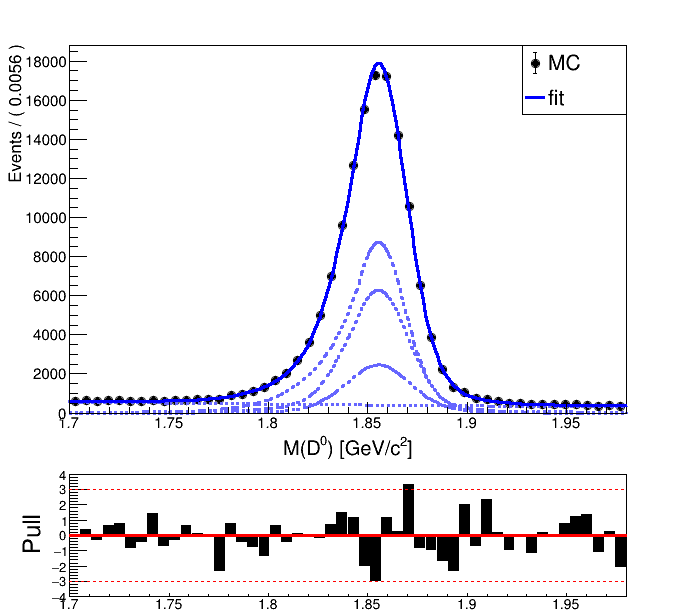

In [54]:
file_name='test.png'
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.70, 1.98, "")
x.setBins(50)
# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )
mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.7,1.6, 1.75)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
tau = ROOT.RooRealVar("tau", "tau",-2, -10,0)

mean1 = ROOT.RooRealVar("mean1", "mean of gaussians", 1.861,1.84, 1.89)
sigma1_1 = ROOT.RooRealVar("sigma1_1", "width of gaussians", 0.021,0,1)
sigma1_2 = ROOT.RooRealVar("sigma1_2", "width of gaussians", 0.011,0,0.5)
sigma1_3= ROOT.RooRealVar("sigma1_3", "width of gaussians", 0.011,0,0.5)
alpha1 = ROOT.RooRealVar("alpha1", "width of gaussians", 0.71,0,5)
n_CB1 = ROOT.RooRealVar("n_CB1", "width of gaussians", 10.1,0,100) 

# mean2 = ROOT.RooRealVar("mean2", "mean of gaussians", 1.862,1.84, 1.89)
sigma2_1 = ROOT.RooRealVar("sigma2_1", "width of gaussians", 0.022,0,1)
sigma2_2 = ROOT.RooRealVar("sigma2_2", "width of gaussians", 0.012,0,0.5)
sigma2_3 = ROOT.RooRealVar("sigma2_3", "width of gaussians", 0.012,0,0.5)
alpha2 = ROOT.RooRealVar("alpha2", "width of gaussians", 0.72,0,5)
n_CB2 = ROOT.RooRealVar("n_CB2", "width of gaussians", 10.2,0,100) 

# mean3 = ROOT.RooRealVar("mean3", "mean of gaussians", 1.863,1.84, 1.89)
sigma3_1 = ROOT.RooRealVar("sigma3_1", "width of gaussians", 0.023,0,1)
sigma3_2 = ROOT.RooRealVar("sigma3_2", "width of gaussians", 0.013,0,0.5)
sigma3_3 = ROOT.RooRealVar("sigma3_3", "width of gaussians", 0.013,0,0.5)
alpha3 = ROOT.RooRealVar("alpha3", "width of gaussians", 0.73,0,5)
n_CB3 = ROOT.RooRealVar("n_CB3", "width of gaussians", 10.3,0,100) 



sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooExponential("sig2", "Signal component 2", x, tau)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
bkg = ROOT.RooAddPdf("bkg", "Signal1", [sig1, sig2], sig1frac)

sig1_1 = ROOT.RooGaussian("sig1_1", "Signal component 1", x, mean1, sigma1_1)
sig1_2 = ROOT.RooCBShape("sig1_2", "Signal component 2", x, mean1, sigma1_2, alpha1, n_CB1)
sig1_3 = ROOT.RooGaussian("sig1_3", "Signal component 1", x, mean1, sigma1_3)


sig1_1frac = ROOT.RooRealVar("sig1_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum1_1 = ROOT.RooAddPdf("sig_sum1_1", "Signal1", [sig1_1, sig1_2], sig1_1frac)
sig1_2frac = ROOT.RooRealVar("sig1_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig1_temp = ROOT.RooAddPdf("sig1_temp", "Signal", [sig1_3, sig_sum1_1], sig1_2frac)

sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", x, mean1, sigma2_1)
sig2_2 = ROOT.RooCBShape("sig2_2", "Signal component 2", x, mean1, sigma2_2, alpha2, n_CB2)
sig2_3 = ROOT.RooGaussian("sig2_3", "Signal component 1", x, mean1, sigma2_3)
#sig2_3 = ROOT.RooNovosibirsk("sig2_3", "Signal component 3", x, mean2, Novo_width2, Novo_tail2)

sig2_1frac = ROOT.RooRealVar("sig2_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum2_1 = ROOT.RooAddPdf("sig_sum2_1", "Signal1", [sig2_1, sig2_2], sig2_1frac)
sig2_2frac = ROOT.RooRealVar("sig2_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig2_temp = ROOT.RooAddPdf("sig2_temp", "Signal", [sig2_3, sig_sum2_1], sig2_2frac)

sig3_1 = ROOT.RooGaussian("sig3_1", "Signal component 1", x, mean1, sigma3_1)
sig3_2 = ROOT.RooCBShape("sig3_2", "Signal component 2", x, mean1, sigma3_2, alpha3, n_CB3)
sig3_3 = ROOT.RooGaussian("sig3_3", "Signal component 1", x, mean1, sigma3_3)
#sig3_3 = ROOT.RooNovosibirsk("sig3_3", "Signal component 3", x, mean3, Novo_width3, Novo_tail3)

sig3_1frac = ROOT.RooRealVar("sig3_1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum3_1 = ROOT.RooAddPdf("sig_sum3_1", "Signal1", [sig3_1, sig3_2], sig3_1frac)
sig3_2frac = ROOT.RooRealVar("sig3_2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)

sig3_temp = ROOT.RooAddPdf("sig3_temp", "Signal", [sig3_3, sig_sum3_1], sig3_2frac)

real_sig_frac = ROOT.RooRealVar("real_sig_frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig1_bkg_model = ROOT.RooAddPdf("sig1_bkg_model", "Signal", [sig1_temp, bkg], real_sig_frac)

real_sig_frac2 = ROOT.RooRealVar("real_sig_frac2", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig2_bkg_model = ROOT.RooAddPdf("sig2_bkg_model", "Signal", [sig2_temp, sig1_bkg_model], real_sig_frac2)

real_sig_frac3 = ROOT.RooRealVar("real_sig_frac3", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig3_temp, sig2_bkg_model], real_sig_frac3)

# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
# sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": pi0_calib['D0_M']}, [x])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.70,1.98))

# r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="fit1", Components=sig1_temp, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="fit2", Components=sig2_temp, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="fit3", Components=sig3_temp, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="bkg", Components=bkg, LineStyle=ROOT.kDashed, LineColor=593)



# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.70)
xmax1 = ctypes.c_double(1.98)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file_name)

### D0_cosHel_0

In [47]:
sig_bkg_D0_cosHel_0_700_ctrl_numpy

array([ 0.5488501 , -0.42287406,  0.51652454, ...,  0.95574157,
       -0.44227759, -0.09673274])

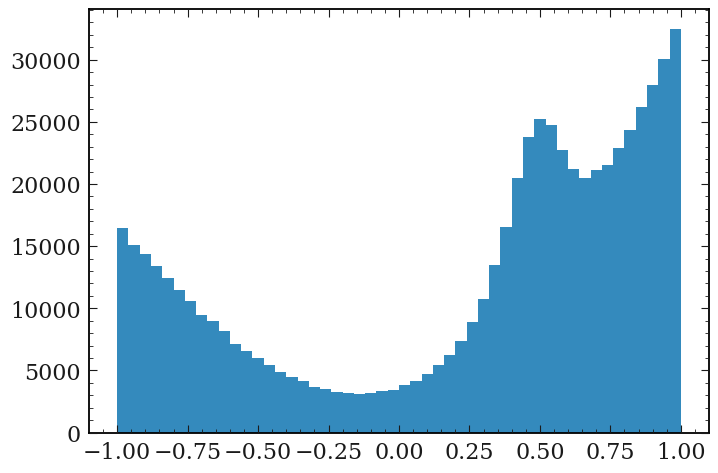

In [55]:
plt.hist(sig_bkg_D0_cosHel_0_700_ctrl_numpy, bins=50);

In [ ]:
pow2 = ROOT.RooPower("pow", "pow", x, RooArgList(0, a2), RooArgList(0,b2))